<a href="https://colab.research.google.com/github/rahulkr6061/DS_Projects/blob/main/Mobile_Phone_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data from kaggle

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json file when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahulkgp6061","key":"d51e1b3cd8378346cdf2d52595537e33"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohannapd/mobile-price-prediction

Dataset URL: https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction
License(s): CC0-1.0


In [ ]:
!unzip mobile-price-prediction.zip

Archive:  mobile-price-prediction.zip
  inflating: Cellphone.csv           
  inflating: Cellphone.xlsx          


## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [ ]:
df = pd.read_csv('/content/Cellphone.csv')  # Replace with the correct filename

In [ ]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


## Exploratory Data Analysis

In [ ]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


### NULL Values

In [ ]:
# Check for missing values
def check_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values[missing_values > 0])
check_missing_values(df)


Missing Values:
 Series([], dtype: int64)


In [ ]:
print(df.describe())

        Product_id        Price         Sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.426087     5.209938   
std     410.851583   768.187171  1546.618517   92.888612     1.509953   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     237.000000  1734.000000    37.000000  134.100000     4.800000   
50%     774.000000  2258.000000   106.000000  153.000000     5.150000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi    cpu core    cpu freq  internal mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.502832     24.501714    2.204994   
std    134.826659    2.444016    0.599783     28.804773    1.609831   
min    121.000000    0.000000    0.000000      0.000000   

### Correlation heatmap


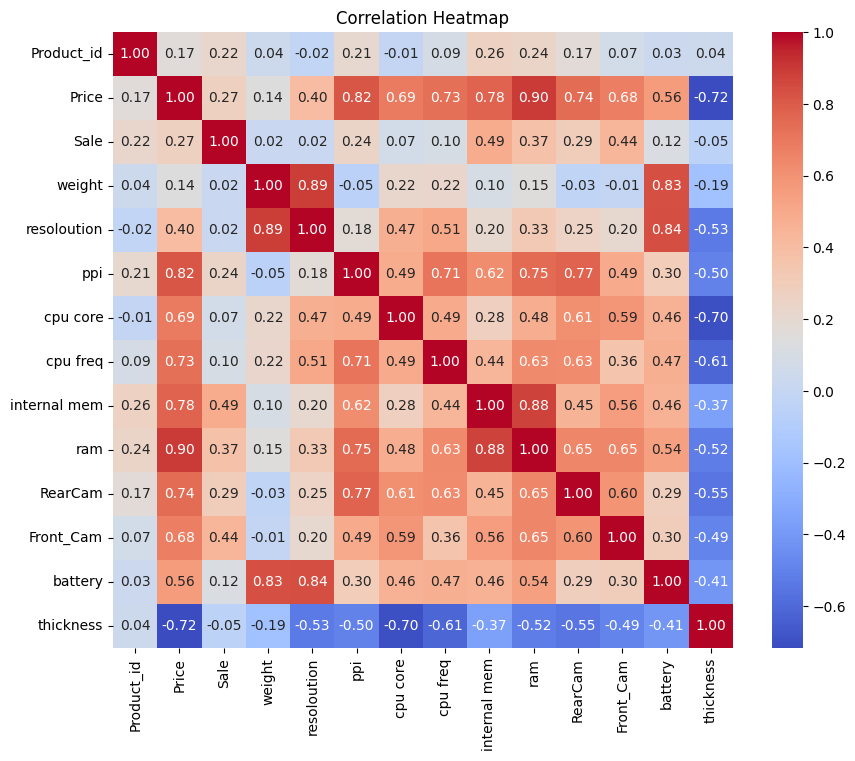

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


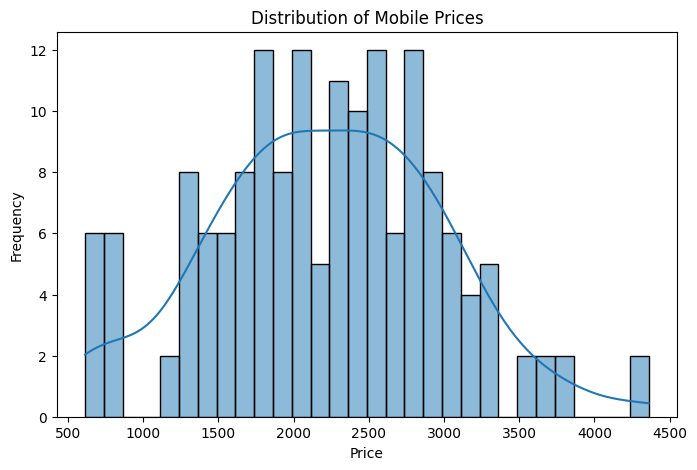

In [ ]:
# Distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Mobile Prices")
plt.show()

### Bivariate analysis of price with other features


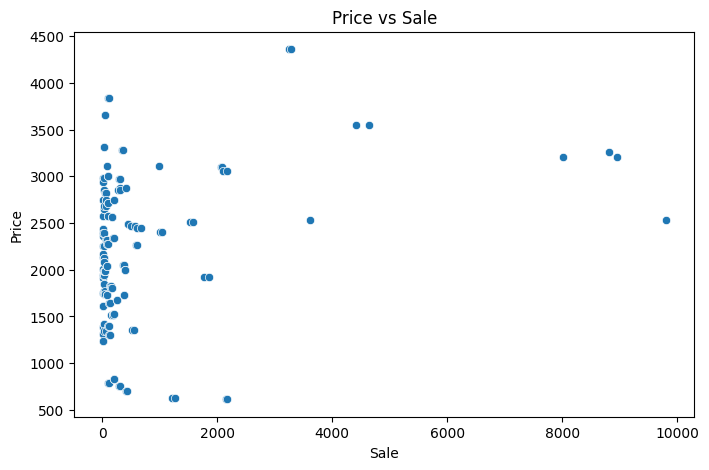

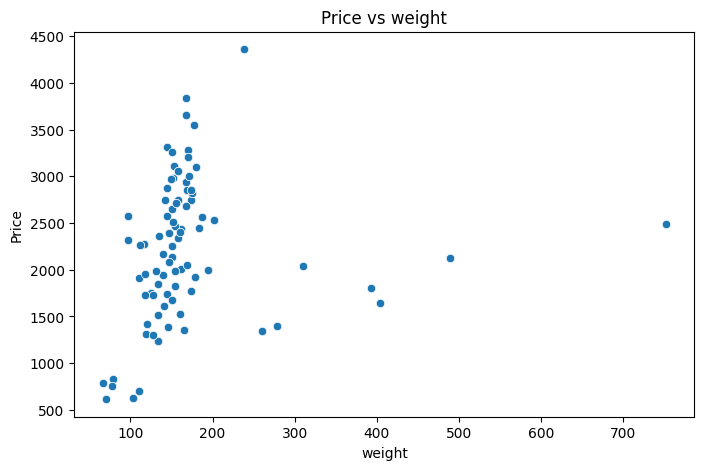

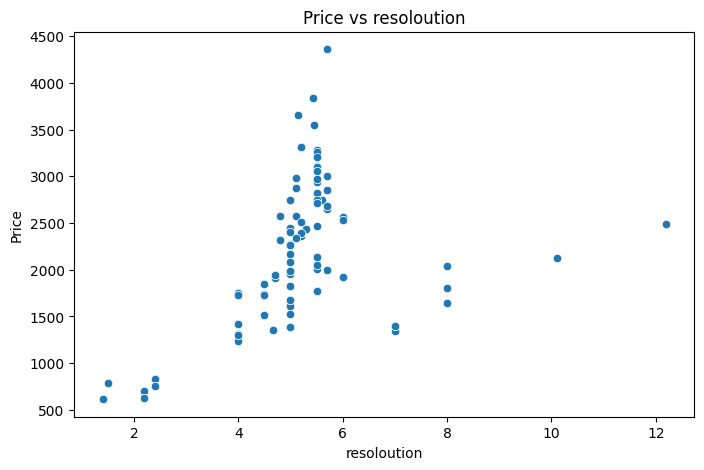

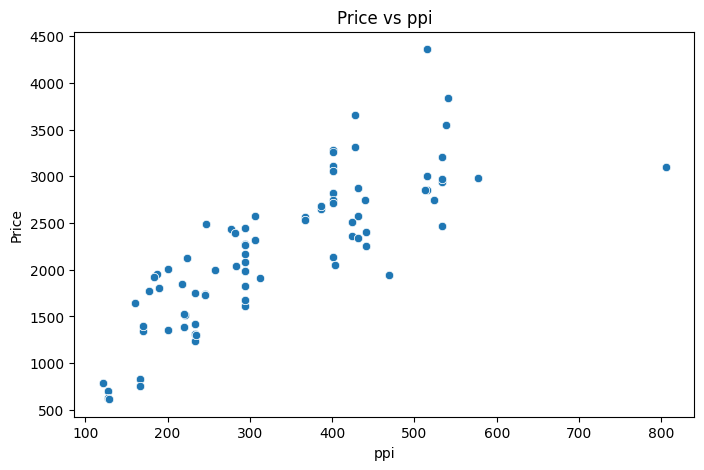

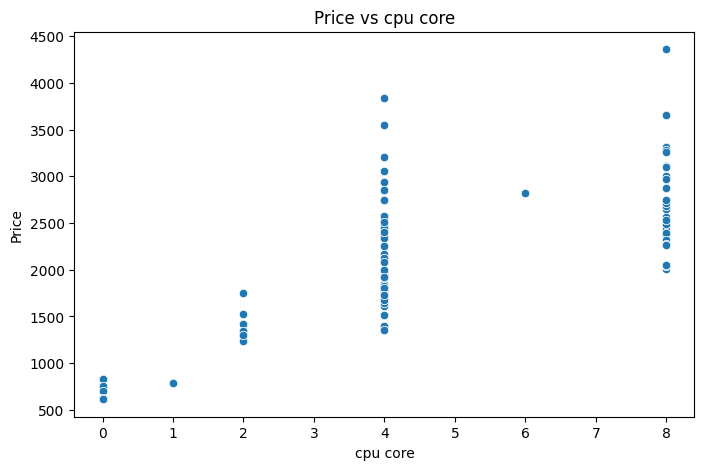

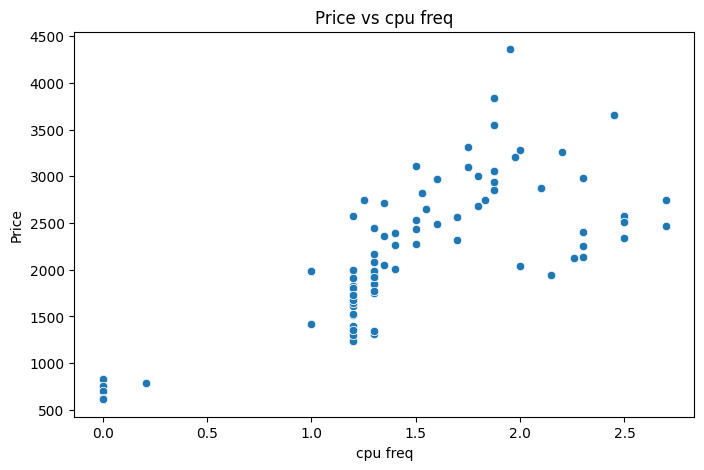

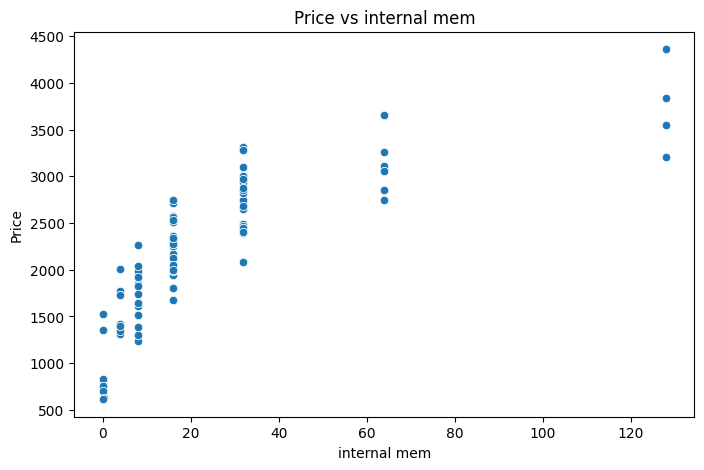

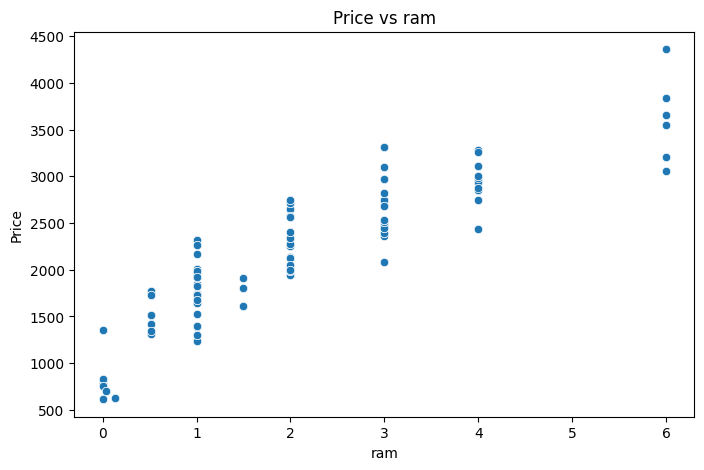

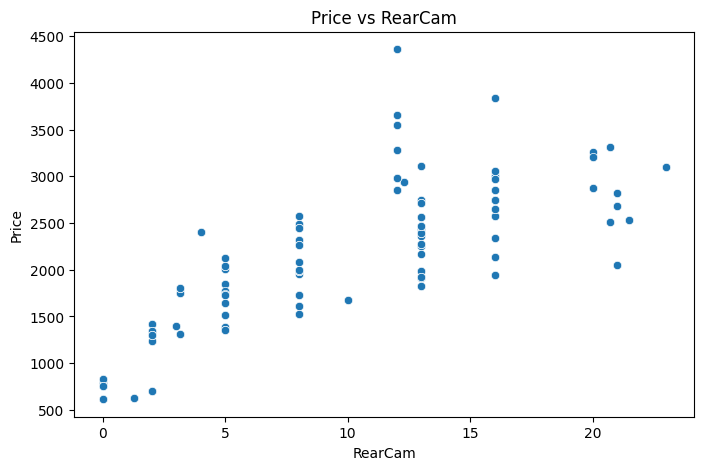

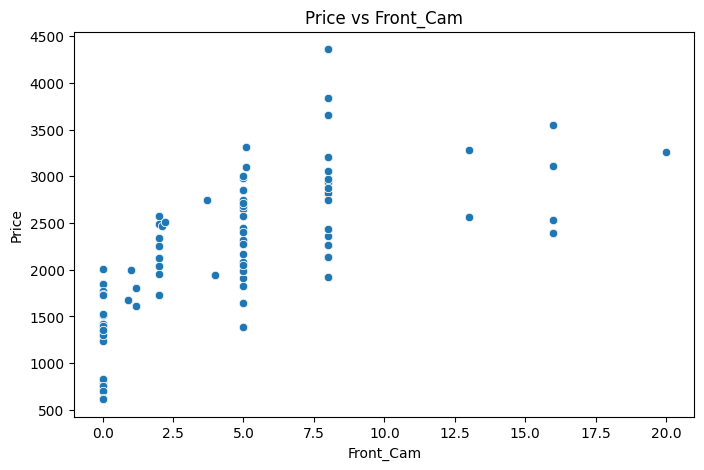

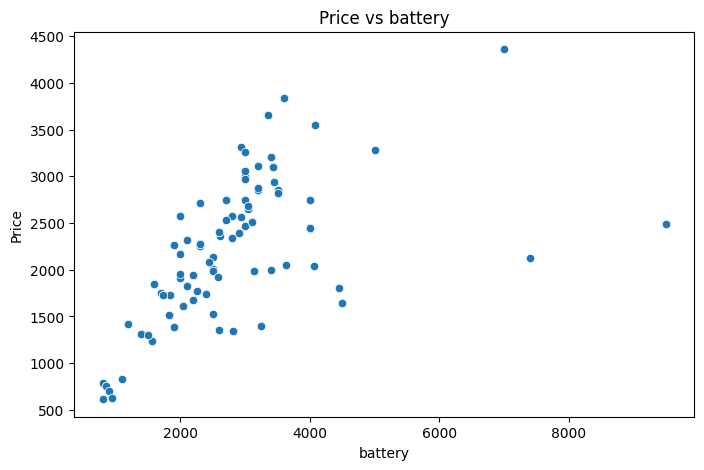

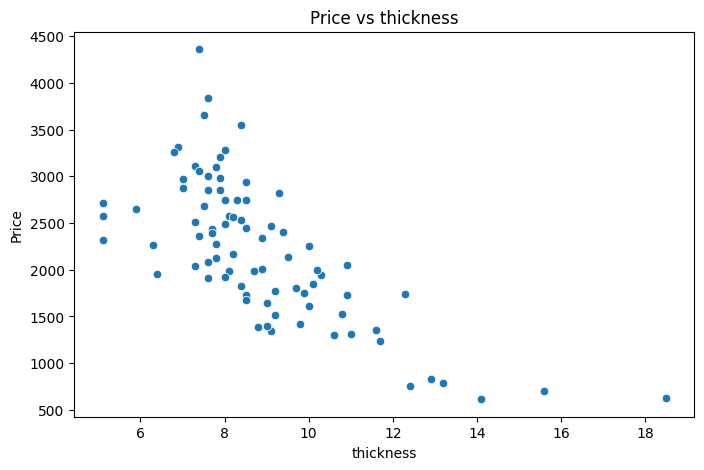

In [36]:
for column in df.columns:
    if column not in ['Price','Product_id']:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[column], y=df['Price'])
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.title(f"Price vs {column}")
        plt.show()

## Modelling

In [39]:
X = df.drop(columns=['Price','Product_id'])
y = df['Price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# feature_list  = [
#     "weight",
#     "resoloution",
#     "ppi",
#     "cpu core",
#     "cpu freq",
#     "internal mem",
#     "ram",
#     "RearCam",
#     "Front_Cam",
#     "battery",
#     "thickness"]

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred = model.predict(X_test)

# Evaluate the model's performance


In [44]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Test RMSE:", rmse)
print("Test R2 Score:", r2)


Test RMSE: 131.04819843142144
Test R2 Score: 0.9697054813303743


## Feature Importance Plot


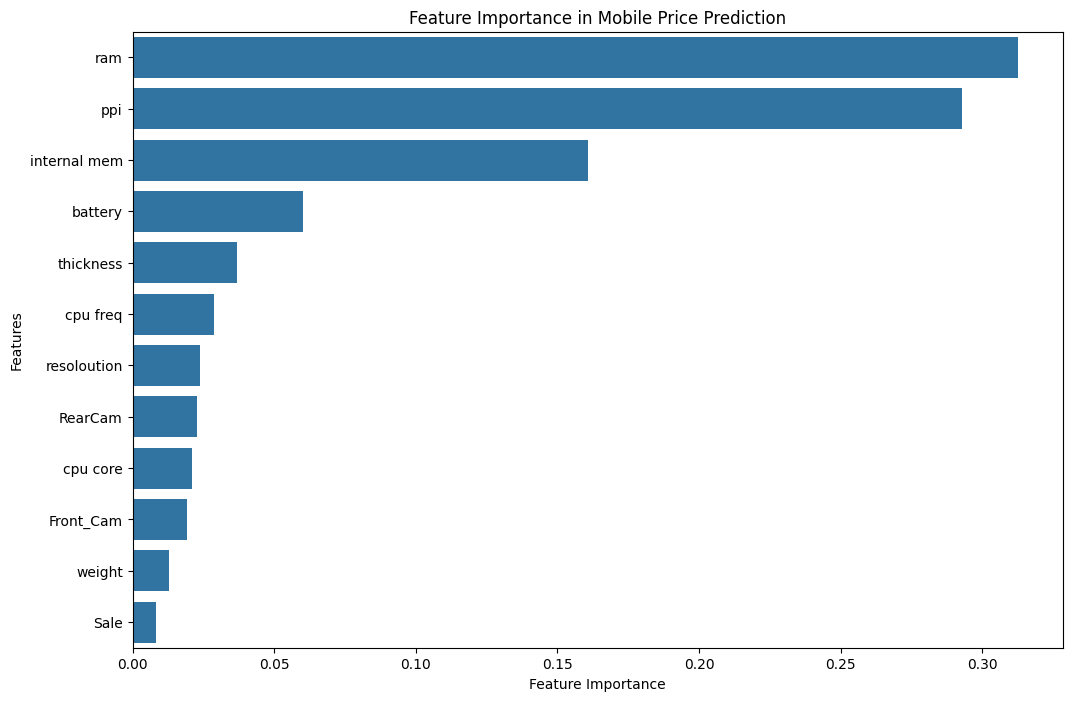

In [50]:
feature_importance = model.feature_importances_
features = X.columns  # Ensure correct feature names

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance, y=sorted_features, orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Mobile Price Prediction")
plt.show()